In [1]:
# CNN Principle

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from struct import unpack
from torchvision.datasets import MNIST
from sklearn.linear_model import LogisticRegression
import torch
from PIL import Image
from torch import nn
# import osy
path = os.path.expanduser('~/data/')

In [7]:
mnist_dataset_train = MNIST(root = path+'/course_data', train=True, download = True)
mnist_dataset_test = MNIST(root = path+'/course_data', train=False, download = True)

## 第一个机器视觉问题：要让计算机自动区分0和6

X_train = mnist_dataset_train.data.numpy()
y_train = mnist_dataset_train.targets.numpy()

X_test = mnist_dataset_test.data.numpy()
y_test = mnist_dataset_test.targets.numpy()

9913344it [00:01, 8775278.70it/s]                              


Extracting /Users/du/data//course_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/du/data//course_data/MNIST/raw



29696it [00:00, 721876.71it/s]           


Extracting /Users/du/data//course_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/du/data//course_data/MNIST/raw



1649664it [00:00, 3805007.09it/s]                            


Extracting /Users/du/data//course_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/du/data//course_data/MNIST/raw



5120it [00:00, 23572817.21it/s]         

Extracting /Users/du/data//course_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/du/data//course_data/MNIST/raw




/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-gqmopi53/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
## Explain CNN principles

In [9]:
def conv(image, filter_):
    # 卷积操作
    print(image.shape)
    print(filter_.shape)
    assert image.shape[-1] == filter_.shape[-1]

    test_image = image
    height, width = filter_.shape[0], filter_.shape[1]

    filter_result = np.zeros((
        test_image.shape[0] - height + 1,
        test_image.shape[1] - width + 1
    ))

    for h in range(test_image.shape[0] - height + 1):
        for w in range(test_image.shape[1] - width + 1):
            sub_windows = test_image[h: h + height, w: w + width, :]
            op = np.sum(np.multiply(sub_windows, filter_))

            filter_result[h][w] = op

    return filter_result

In [10]:
# Part 2: Strides
"""
Try to modify stride in Conv Function
"""

# Part3: Pooling
"""
Create a pooling cell for conv
"""

# Part4: Volume
"""
Create 3-d volume filter
"""

# Part5: Fully Connected Layers
"""
Create Fully Connected Layer, to flatten
"""

# Part6: Cross-Entropy
"""
Create Cross-Entropy cell to get loss value
"""

# Part7: ResNet
"""
Why we need resNet, and its functions
"""

class ResBlock(nn.Module):
    """
    一个非常基本的ResNet的单元
    该单元通过：
        batch normal
        输出的值保留了原来的输入值，使得我们的结果不要消散
    """
    def __init__(self, n_channel):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_channel, n_channel, kernel_size = 3, padding=1, bias = False)
        self.bath_norm = nn.BatchNorm2d(num_features = n_channel)

        torch.nn.init.constant_(self.bath_norw.weight, 0.5)
        torch.nn.init.zeros_(self.bath_norm.bias)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity = 'relu')
        # sum(windows * filter) ==> windows 越大 相加的值就越大 windows越小 这个值越小

In [11]:
def forward(self, x):
    out = self.conv(x)
    out = self.conv(out)
    out = self.bath_norm(out)
    out = torch.relu(out)

    return out + x

applying filter: 0
(1931, 1931, 3)
(3, 3, 3)
applying filter: 1
(1931, 1931, 3)
(3, 3, 3)
applying filter: 2
(1931, 1931, 3)
(3, 3, 3)


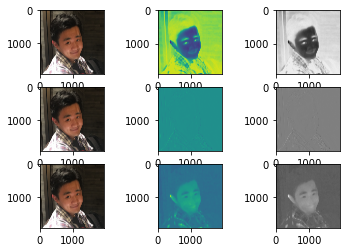

In [12]:
if __name__ == '__main__':
    image = Image.open(path+ '/course_data/doo.jpeg')

    image_array = np.array(image)
    plt.imshow(image_array)

    # Robert 算子
    rebert_1_kernel = np.array([
        [1, 0],
        [0, -1]
    ])
    robert_2_kernel = np.array([
        [0, 1],
        [-1, 0]
    ])

    #Sobel 算子
    sobel_x_kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    sobel_y_kernel = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    # Laplacian 算子
    laplacian_kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])

    filters = [
        np.array([sobel_x_kernel] * 3),
        np.array([sobel_y_kernel] * 3),
        np.array([laplacian_kernel] * 3)
    ]

    for i, f in enumerate(filters):
        print('applying filter: {}'.format(i))

        plt.subplot(3, 3, i * 3 + 1)
        plt.imshow(image_array)

        filter_result = conv(image_array, f)
        plt.subplot(3, 3, i * 3 + 2)
        plt.imshow(filter_result)

        plt.subplot(3, 3, i * 3 + 3)
        plt.imshow(filter_result, cmap = 'gray')

plt.show()

#ResNet

# 验证码识别

训练一个模型，对验证码中的字符进行分类识别，并最终完成验证码识别

用的数据集包含0-9以及A-Z共计36个字符，训练集中每个字符有50张图片，验证集中每个字符有10张图片，验证码数据集是由随机取出的4个字符图片拼接而成。

## 相关知识点
1. 数据读取
1. 使用torch搭建、训练、验证模型
1. 模型预测与图片切分

## 分析

### 问题1——建立字符对照表
我们可以通过遍历字典，将每一对键与值反转，并存储于新的字典中，样例代码如下：
```
new_dict = {v : k for k, v in old_dict.items()}
```
### 问题2——定义datasets与dataloader
在opencv-python中，可使用`image = cv2.medianBlur(image, kernel_size)`进行中值滤波。
### 问题3——定义网络结构
在torch中，卷积与全连接层的定义方式如下：
```
conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding) 
fc = nn.Linear(in_features, out_features, bias)
```
### 问题4——定义模型训练函数
torch框架的模型训练过程包含清空梯度、前向传播、计算损失、计算梯度、更新权重等操作，其中：
1. 清空梯度：目的是消除step与step之间的干扰，即每次都只用一个batch的数据损失计算梯度并更新权重。一般可以放在最前或最后；
1. 前向传播：使用一个batch的数据跑一边前向传播的过程，生成模型输出结果；
1. 计算损失：使用定义好的损失函数、模型输出结果以及label计算单个batch的损失值；
1. 计算梯度：根据损失值，计算模型所有权中在本次优化中所需的梯度值；
1. 更新权重：使用计算好的梯度值，更新所有权重的值。
单次流程的样例代码如下：
```
>>> optimizer.zero_grad() # 清空梯度（也可以放在最后一行）
>>> output = model(data) # 前向传播
>>> loss = loss_fn(output, target) # 计算损失
>>> loss.backward() # 计算梯度
>>> optimizer.step() # 更新权重
```

## 开始

### 导入本次项目要使用到的库

In [21]:
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pickle
import PIL
import matplotlib.pyplot as plt
from PIL import Image
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

ImportError: dlopen(/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so, 2): Library not loaded: /opt/homebrew/opt/ffmpeg/lib/libavcodec.58.dylib
  Referenced from: /Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so
  Reason: image not found

### 了解数据集
定义数据路径

In [21]:
train_data_dir = path+'/course_data/train_data.bin'
val_data_dir = path+'/course_data/val_data.bin'
verification_code_dir = path+'/course_data/verification_code_data.bin'

使用的数据集保存于二进制文件中，我们需要定义一个函数，读取二进制文件中的图片。

In [28]:
def load_file(file_name):
    with open(file_name, mode ='rb') as f:
        result = pickle.load(f)
    return result

看看数据集是什么样：

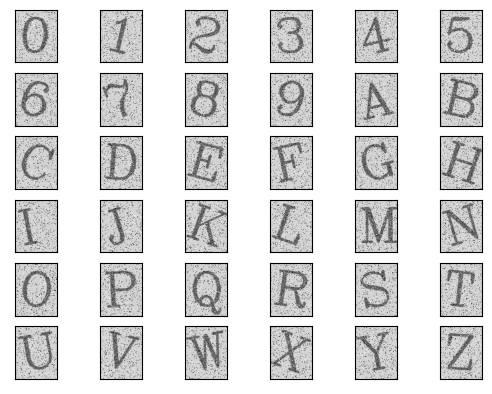

In [29]:
train_data = load_file(train_data_dir)
img_test = list()
for i in range(1, 1800, 50):
    img_test.append(train_data[i][1])
plt.figure()

for i in range(1, 37):
    plt.subplot(6, 6, i)
    plt.imshow(img_test[i-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

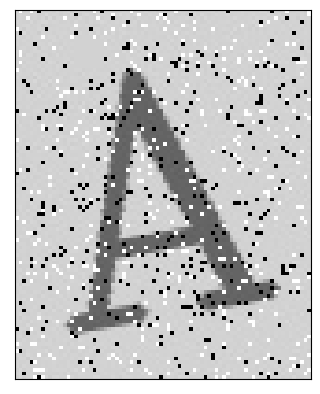

In [46]:
# 查看单张大图
# plt.subplot(6, 6, i)
plt.imshow(train_data[500][1])
plt.xticks([])
plt.yticks([])
plt.show()

可以看到，字符图片中含有大量的噪声，而噪声会对模型预测结果产生不良影响，因此我们可以在数据预处理时，使用特定的滤波器，消除图片噪声

### 问题1——建立字符对照表
简单观察可知，刚才定义字符字典中，键与值都没有重复项，因此可以将字典中的键与值进行反转，以便我们用值查找键（将模型预测结果转换成可读字符）
下面需要你补全下列代码，将字典中的键与值进行反转（例：`dict={'A':10,'B':11}`反转后得到`new_dict={10:'A',11:'B'}`

In [51]:
char_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,\
            'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,\
            'N':23,'O':24,'P':25,'Q':26,'R':27,'S':28,'T':29,'U':30,'V':31,'W':32,'X':33,'Y':34,'Z':35 }

new_char_dict = {v : k for k, v in char_dict.items()}

### 问题2——定义datasets与dataloader
我们需要使用`torch.utils.data.Dataset`作为父类，定义自己的datasets，以便规范自己的数据集。

In [74]:
class iDataset(Dataset):
    def __init__(self, file_name, transforms):
        self.file_name = file_name # file name
        self.image_label_arr = load_file(self.file_name) # 读入二进制文件
        self.transforms = transforms # 图片转换器
    
    def __getitem__(self, index):
        label, img = self.image_label_arr[index]
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # 将图片转为灰度图 
        img = cv2.medianBlur(img, 5) # 使用中值模糊除去图片噪音
        img = self.transforms(img) # 对图片进行转换
        return img, char_dict[label[0]]

    def __len__(self):
        return len(self.image_label_arr)



下面我们就可以定义transform和dataloader了。

In [75]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize([28, 28]),  # 将图片尺寸调整为28*28
                                transforms.ToTensor(),  # 将图片转为tensor
                                transforms.Normalize(mean = [0.5], std = [0.5])])  # 进行归一化处理

train_datasets = iDataset(train_data_dir, transform)
train_loader = DataLoader(dataset=train_datasets, batch_size=32, shuffle = True)

val_datasets = iDataset(val_data_dir, transform)
val_loader = DataLoader(dataset=val_datasets, batch_size = 32, shuffle = True)

### 问题3——定义网络结构
在数据准备好之后，我们需要定义一个简单的卷积神经网络，神经网络的输入是`[batchsize,chanel(1),w(28),h(28)]`，输出是36个分类。
我们的神经网络将使用2个卷积层搭配2个全连接层，这四层的参数设置如下表所示(未标注的直接使用默认参数即可)：
1. conv1: in_chanel=1, out_chanel=10, kernel_size=5
1. conv2: in_chanel=10, out_chanel=20, kernel_size=3
1. fc1: in_feature=2000, out_feature=500
1. fc2: in_feature=500, out_feature=36
请根据上述参数，补全模型代码：

In [76]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO:
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 3)
        self.fc1 = nn.Linear(20 * 10 * 10,  500)
        self.fc2 = nn.Linear(500, 36)

    def forward(self, x):
        # inputsize: [b, 1, 28, 28]
        in_size = x.size(0) # b
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, 2, 2)
        out = self.conv2(out)
        out = F.relu(out)
        out = out.view(in_size, -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.log_softmax(out, dim = 1)
        return out

### 问题4——定义模型训练函数
下面你需要补全模型训练函数，实现如下操作：
1. 清空梯度
1. 前向传播
1. 计算梯度
1. 更新权重

In [81]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if(batch_idx + 1) % 10 == 0:
            print('Train Epoch: {} [{} / {} ({:.0f} %)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))


### 定义模型测试函数

In [85]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction = 'sum')
            pred = output.max(1, keepdim = True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%) \n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

### 定义模型及优化器
我们将刚刚搭建好的模型结构定义为model，并选择使用Adam优化器。

In [86]:
model = ConvNet()
optimizer = optim.Adam(model.parameters())

### 模型训练与测试
我们可以先设置epochs数为3，进行模型训练，看看模型精度是多少，是否满足验证码识别的要求。
如果模型精度不够，你还可以尝试调整epochs数，重新进行训练。

In [87]:
EPOCHS = 3
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, val_loader)

Train Epoch: 1 [288 / 1800 (16 %)]	Loss: 3.340514
Train Epoch: 1 [608 / 1800 (33 %)]	Loss: 2.872326
Train Epoch: 1 [928 / 1800 (51 %)]	Loss: 1.977929
Train Epoch: 1 [1248 / 1800 (68 %)]	Loss: 1.098688
Train Epoch: 1 [1568 / 1800 (86 %)]	Loss: 0.535660

Test set: Average loss: 0.2888, Accuracy: 328/360 (91%) 

Train Epoch: 2 [288 / 1800 (16 %)]	Loss: 0.072813
Train Epoch: 2 [608 / 1800 (33 %)]	Loss: 0.139866
Train Epoch: 2 [928 / 1800 (51 %)]	Loss: 0.109487
Train Epoch: 2 [1248 / 1800 (68 %)]	Loss: 0.058259
Train Epoch: 2 [1568 / 1800 (86 %)]	Loss: 0.013144

Test set: Average loss: 0.0099, Accuracy: 360/360 (100%) 

Train Epoch: 3 [288 / 1800 (16 %)]	Loss: 0.010245
Train Epoch: 3 [608 / 1800 (33 %)]	Loss: 0.004797
Train Epoch: 3 [928 / 1800 (51 %)]	Loss: 0.002203
Train Epoch: 3 [1248 / 1800 (68 %)]	Loss: 0.006250
Train Epoch: 3 [1568 / 1800 (86 %)]	Loss: 0.005230

Test set: Average loss: 0.0028, Accuracy: 360/360 (100%) 



### 定义模型测试函数

In [92]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss =+ F.nll_loss(output, target, reduction = 'sum')
            pred = output.max(1, keepdim = True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy : {}/{} ({:.0f}%) \n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

### 定义模型及优化器
我们将刚刚搭建好的模型结构定义为model，并选择使用Adam优化器。

In [93]:
model = ConvNet()
optimizer = optim.Adam(model.parameters())

### 模型训练与测试
我们可以先设置epochs数为3，进行模型训练，看看模型精度是多少，是否满足验证码识别的要求。
如果模型精度不够，你还可以尝试调整epochs数，重新进行训练。

In [94]:
EPOCHS = 3
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, val_loader)

Train Epoch: 1 [288 / 1800 (16 %)]	Loss: 3.508450
Train Epoch: 1 [608 / 1800 (33 %)]	Loss: 3.288610
Train Epoch: 1 [928 / 1800 (51 %)]	Loss: 2.584805
Train Epoch: 1 [1248 / 1800 (68 %)]	Loss: 1.180833
Train Epoch: 1 [1568 / 1800 (86 %)]	Loss: 0.564084

Test set: Average loss: 0.0088, Accuracy : 316/360 (88%) 

Train Epoch: 2 [288 / 1800 (16 %)]	Loss: 0.173177
Train Epoch: 2 [608 / 1800 (33 %)]	Loss: 0.043262
Train Epoch: 2 [928 / 1800 (51 %)]	Loss: 0.054462
Train Epoch: 2 [1248 / 1800 (68 %)]	Loss: 0.052596
Train Epoch: 2 [1568 / 1800 (86 %)]	Loss: 0.013714

Test set: Average loss: 0.0006, Accuracy : 360/360 (100%) 

Train Epoch: 3 [288 / 1800 (16 %)]	Loss: 0.004590
Train Epoch: 3 [608 / 1800 (33 %)]	Loss: 0.007654
Train Epoch: 3 [928 / 1800 (51 %)]	Loss: 0.004135
Train Epoch: 3 [1248 / 1800 (68 %)]	Loss: 0.003140
Train Epoch: 3 [1568 / 1800 (86 %)]	Loss: 0.003019

Test set: Average loss: 0.0001, Accuracy : 360/360 (100%) 



模型已经训练完成了！最后一个epoch的测试集精度是否超过了99%呢？

### 验证码识别
成功实现数字识别之后，我们就可以开始进行验证码识别了！
首先要导入验证码数据集：

In [95]:
verification_code_data = load_file(verification_code_dir)

下面我们随便选一张图（图6），看看这个验证码长什么样。

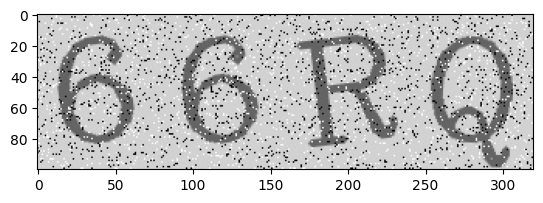

In [96]:
image = verification_code_data[6]
IMG = Image.fromarray(cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB))
plt.imshow(IMG)
plt.show()

下面再来看看中值滤波能对验证码图片产生什么效果。

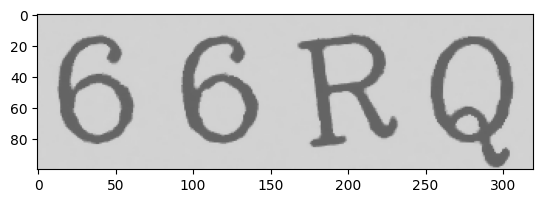

In [97]:
img = cv2.medianBlur(image.copy(), 5)
plt.imshow(img)
plt.show()

最后让我们看看验证码识别的实际结果：

In [100]:
IMAGES = list()
NUMS = list()

for img in verification_code_data:
    IMAGES.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    image_1 = img[:, :80]
    image_2 = img[:, 80:160]
    image_3 = img[:, 160:240]
    image_4 = img[:, 240:320]
    img_list = [image_1, image_2, image_3, image_4]

    nums = []
    for one_img in img_list:
        one_img = transform(one_img)
        one_img = one_img.unsqueeze(0)
        output = model(one_img)
        nums.append(new_char_dict[torch.argmax(output).item()])
    NUMS.append('Verification_code: '+ ''.join(nums))


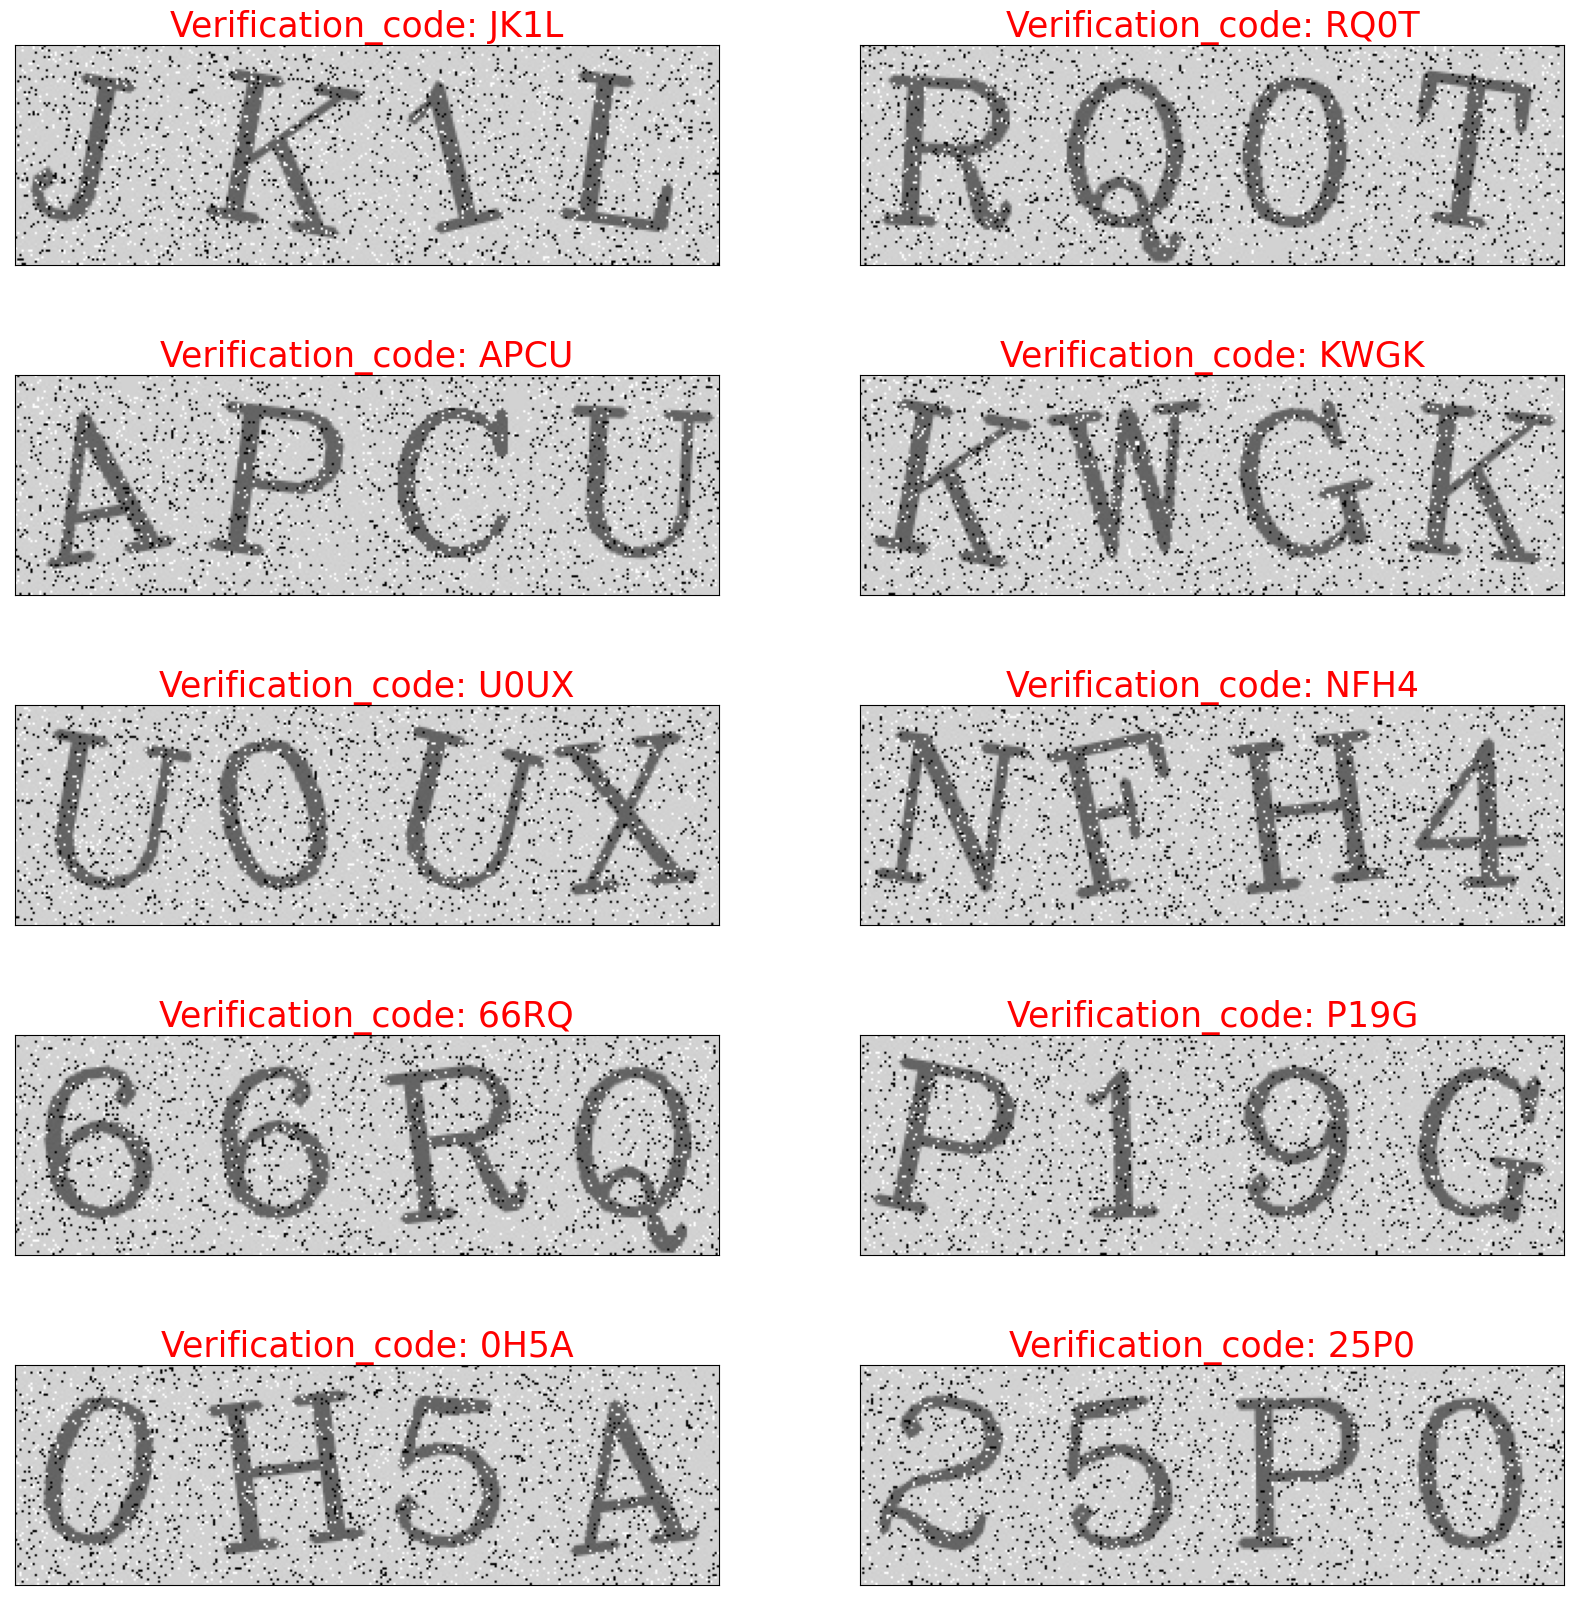

In [101]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace = 0.2, hspace=0.5)
for i in range(1, 11):
    plt.subplot(5, 2, i)
    plt.title(NUMS[i-1], fontsize = 25, color = 'red')
    plt.imshow(IMAGES[i - 1])
    plt.xticks([])
    plt.yticks([])
plt.show()